In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.90, random_state=24)

In [3]:
# Function to plot the clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:  # DBSCAN noise points
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label='Noise', color='k')
        else:
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

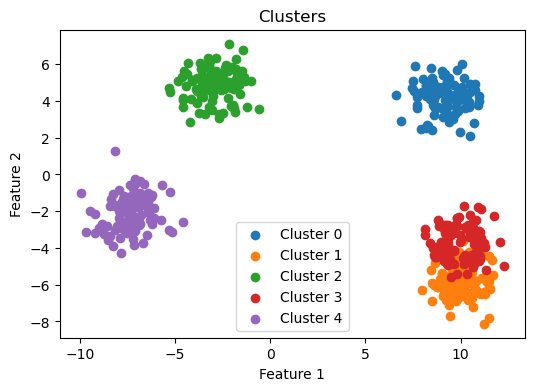

In [4]:
plot_clusters(X, y, 'Clusters')


In [5]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

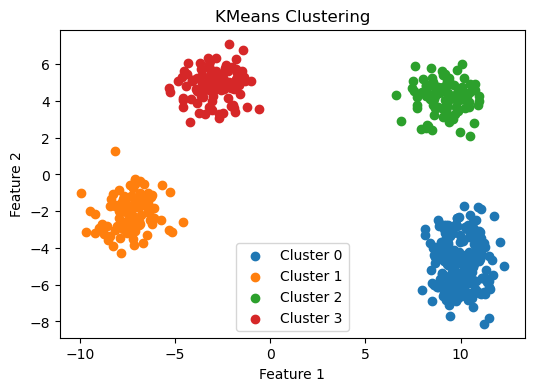

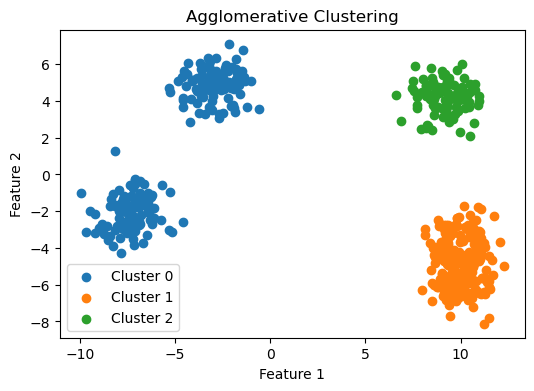

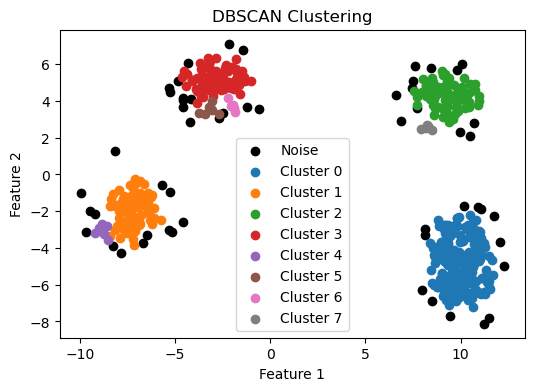

In [6]:

# Visualize KMeans clusters
plot_clusters(X, labels_kmeans, 'KMeans Clustering')

# Visualize Agglomerative clusters
plot_clusters(X, labels_agglo, 'Agglomerative Clustering')

# Visualize DBSCAN clusters
plot_clusters(X, labels_dbscan, 'DBSCAN Clustering')

In [7]:

# Calculate evaluation metrics for KMeans
silhouette_kmeans = silhouette_score(X, labels_kmeans)
ch_score_kmeans = calinski_harabasz_score(X, labels_kmeans)
db_score_kmeans = davies_bouldin_score(X, labels_kmeans)
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')
print(f'Calinski-Harabasz Index for KMeans: {ch_score_kmeans}')
print(f'Davies-Bouldin Index for KMeans: {db_score_kmeans}')


Silhouette Score for KMeans: 0.7897504970506379
Calinski-Harabasz Index for KMeans: 5790.7112797504715
Davies-Bouldin Index for KMeans: 0.28758515514600347


In [8]:

# Calculate evaluation metrics for Agglomerative
silhouette_agglo = silhouette_score(X, labels_agglo)
ch_score_agglo = calinski_harabasz_score(X, labels_agglo)
db_score_agglo = davies_bouldin_score(X, labels_agglo)
print(f'Silhouette Score for Agglomerative: {silhouette_agglo}')
print(f'Calinski-Harabasz Index for Agglomerative: {ch_score_agglo}')
print(f'Davies-Bouldin Index for Agglomerative: {db_score_agglo}')


Silhouette Score for Agglomerative: 0.73010512835756
Calinski-Harabasz Index for Agglomerative: 1843.9623896302314
Davies-Bouldin Index for Agglomerative: 0.3616974319746933


In [9]:

# Calculate evaluation metrics for DBSCAN
# Note: Silhouette Score and Davies-Bouldin Index can be calculated with DBSCAN
# Calinski-Harabasz Index is not meaningful with noise points
valid_labels = labels_dbscan != -1  # exclude noise points
silhouette_dbscan = silhouette_score(X[valid_labels], labels_dbscan[valid_labels])
db_score_dbscan = davies_bouldin_score(X[valid_labels], labels_dbscan[valid_labels])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
print(f'Davies-Bouldin Index for DBSCAN: {db_score_dbscan}')

Silhouette Score for DBSCAN: 0.5029049524476528
Davies-Bouldin Index for DBSCAN: 0.6024328049027263


In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

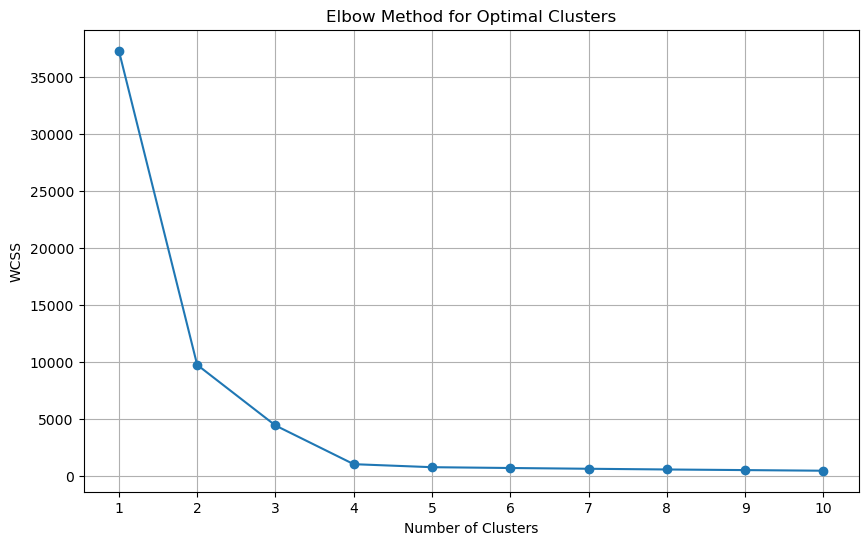

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()